<a href="https://colab.research.google.com/github/lakshithagnk/CNN-image-classification/blob/main/Assignment_03_MINIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 CNN for image classification

1. Set up your environment: Ensure that you have installed all the required software packages.


In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.optimizers import Adam

2. Prepare your dataset: Choose a data set from UCI Machine Learning Repository that is appropriate for classification. Download the selected dataset.

3. Split the dataset into training, validation, and testing subsets using a ratio of 60% for training and 20% each for validation and testing sets.

In [2]:
# Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Combine train and test sets
images = np.concatenate((train_images, test_images), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Normalize and reshape the input data
images = images / 255.0
images = images.reshape(-1, 28, 28, 1)  # Add the channel dimension

# Split the dataset into training, validation, and testing sets
train_images, temp_images, train_labels, temp_labels = train_test_split(images, labels, test_size=0.4, random_state=42)
val_images, test_images, val_labels, test_labels = train_test_split(temp_images, temp_labels, test_size=0.5, random_state=42)

print("Training set shape:", train_images.shape, train_labels.shape)
print("Validation set shape:", val_images.shape, val_labels.shape)
print("Testing set shape:", test_images.shape, test_labels.shape)


11490434/11490434 [==============================] - 0s 0us/step
Training set shape: (42000, 28, 28, 1) (42000,)
Validation set shape: (14000, 28, 28, 1) (14000,)
Testing set shape: (14000, 28, 28, 1) (14000,)


4. Build the CNN model: A common CNN design consists of interleaving convolutional and max-pooling layers, ending with a linear classification layer

In [3]:
model = models.Sequential([
    # Convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    # Output layer (10 - class)
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 64)                5

7. Train the model: Train the model using the training data for 20 epochs and plot
training and validation loss for with respect to epoch. Here, for the optimizer
you may use adam and sparse categorical crossentropy as the loss function. Set
a suitable learning rate.

In [4]:
learning_rate = 0.0005
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [5]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=1024,validation_data=(val_images, val_labels))

Epoch 1/20
42/42 [==============================] - 30s 685ms/step - loss: 1.8606 - accuracy: 0.4109 - val_loss: 0.8345 - val_accuracy: 0.8069
Epoch 2/20
42/42 [==============================] - 28s 662ms/step - loss: 0.6967 - accuracy: 0.7813 - val_loss: 0.3152 - val_accuracy: 0.9111
Epoch 3/20
42/42 [==============================] - 27s 639ms/step - loss: 0.3795 - accuracy: 0.8860 - val_loss: 0.2140 - val_accuracy: 0.9386
Epoch 4/20
42/42 [==============================] - 26s 632ms/step - loss: 0.2760 - accuracy: 0.9190 - val_loss: 0.1692 - val_accuracy: 0.9496
Epoch 5/20
42/42 [==============================] - 27s 644ms/step - loss: 0.2180 - accuracy: 0.9351 - val_loss: 0.1360 - val_accuracy: 0.9594
Epoch 6/20
42/42 [==============================] - 26s 624ms/step - loss: 0.1835 - accuracy: 0.9466 - val_loss: 0.1229 - val_accuracy: 0.9624
Epoch 7/20
42/42 [==============================] - 26s 629ms/step - loss: 0.1719 - accuracy: 0.9497 - val_loss: 0.1091 - val_accuracy: 0.9681

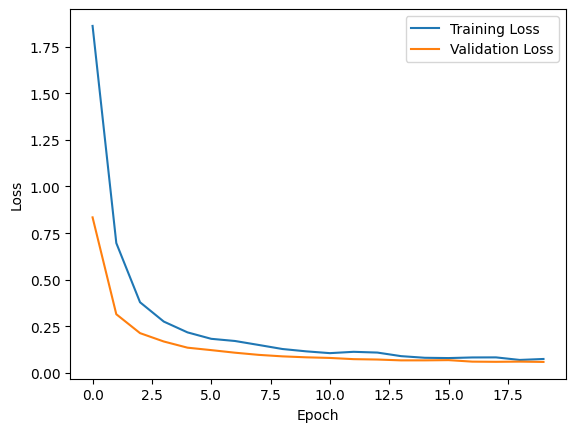

In [6]:
# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

10. Evaluate the Model: After training, evaluate the model’s performance on the testing
dataset. Record the train/test accuracy, confusion matrix, precision and recall.

438/438 [==============================] - 2s 5ms/step - loss: 0.0679 - accuracy: 0.9791
Test accuracy: 0.9791428446769714
438/438 [==============================] - 2s 5ms/step


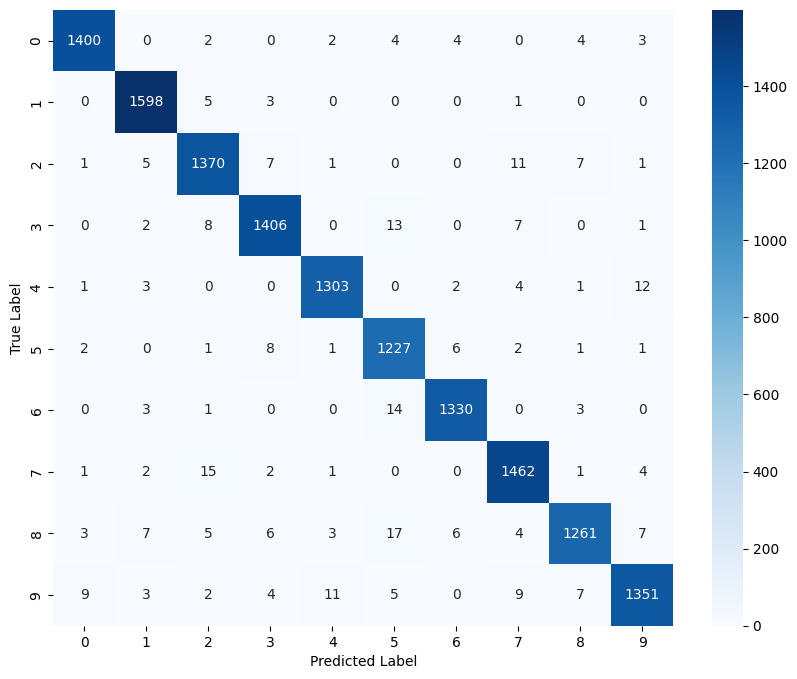

In [7]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)

# Predict the classes for test images
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [8]:
# precision and recall
report = classification_report(test_labels, predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1419
           1       0.98      0.99      0.99      1607
           2       0.97      0.98      0.97      1403
           3       0.98      0.98      0.98      1437
           4       0.99      0.98      0.98      1326
           5       0.96      0.98      0.97      1249
           6       0.99      0.98      0.99      1351
           7       0.97      0.98      0.98      1488
           8       0.98      0.96      0.97      1319
           9       0.98      0.96      0.97      1401

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



In [9]:
# precision and recall
precision = precision_score(test_labels, predicted_classes, average='weighted')
recall = recall_score(test_labels, predicted_classes, average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Precision: 0.9792
Recall: 0.9791


11. Plot training and validation loss for with respect to epoch for different learning rates
such as 0.0001, 0.001, 0.01, and 0.1. Comment on your results and select a learning
rate with a justification.

# 2 Compare your network with state-of-the-art networks

12. Choose two state-of-the-art pre-trained model
13. Load the pre-trained model and fine-tune it for the your dataset


In [10]:
# Adjust MNIST images to RGB for pretrained models
train_images_rgb = np.repeat(train_images, 3, axis = -1)
val_images_rgb = np.repeat(val_images, 3, axis = -1)
test_images_rgb = np.repeat(test_images, 3, axis = -1)

# Resize images to 32x32
train_images_rgb = tf.image.resize(train_images_rgb, [32, 32])
val_images_rgb = tf.image.resize(val_images_rgb, [32, 32])
test_images_rgb = tf.image.resize(test_images_rgb, [32, 32])

# Function to build and fine-tune a model
def build_fine_tune_model(base_model, input_shape, trainable = False):
    # Freeze the base model layers
    base_model.trainable = trainable

    # Build the model
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation = 'relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation = 'softmax')
    ])
    return model


# Load pretrained ResNet50
resnet_base = ResNet50(weights = 'imagenet', include_top = False, input_shape = (32, 32, 3))
resnet_model = build_fine_tune_model(resnet_base, input_shape = (32, 32, 3))

# Compile the ResNet model
resnet_model.compile(optimizer = Adam(learning_rate = 0.0005), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


# Load pretrained VGG16
vgg_base = VGG16(weights='imagenet', include_top = False, input_shape = (32, 32, 3))
vgg_model = build_fine_tune_model(vgg_base, input_shape = (32, 32, 3))

# Compile the VGG model
vgg_model.compile(optimizer = Adam(learning_rate = 0.0005), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


58889256/58889256 [==============================] - 0s 0us/step


14. Train the fine-tuned model using the same training and testing data split as your custom CNN model
15. Record training and validation loss values for each epoch

In [11]:
# Train ResNet50
history_resnet = resnet_model.fit(train_images_rgb, train_labels, validation_data = (val_images_rgb, val_labels), epochs = 10, batch_size = 1024)


Epoch 1/10
42/42 [==============================] - 231s 5s/step - loss: 2.3328 - accuracy: 0.2638 - val_loss: 1.6415 - val_accuracy: 0.5380
Epoch 2/10
42/42 [==============================] - 225s 5s/step - loss: 1.5733 - accuracy: 0.4810 - val_loss: 1.3047 - val_accuracy: 0.6944
Epoch 3/10
42/42 [==============================] - 226s 5s/step - loss: 1.3389 - accuracy: 0.5763 - val_loss: 1.1093 - val_accuracy: 0.7349
Epoch 4/10
42/42 [==============================] - 224s 5s/step - loss: 1.1830 - accuracy: 0.6358 - val_loss: 0.9673 - val_accuracy: 0.7626
Epoch 5/10
42/42 [==============================] - 224s 5s/step - loss: 1.0736 - accuracy: 0.6704 - val_loss: 0.8666 - val_accuracy: 0.7859
Epoch 6/10
42/42 [==============================] - 224s 5s/step - loss: 0.9870 - accuracy: 0.6993 - val_loss: 0.7891 - val_accuracy: 0.8000
Epoch 7/10
42/42 [==============================] - 226s 5s/step - loss: 0.9226 - accuracy: 0.7180 - val_loss: 0.7231 - val_accuracy: 0.8133
Epoch 8/10
42

KeyboardInterrupt: 

In [12]:
# Train VGG16
history_vgg = vgg_model.fit(train_images_rgb, train_labels, validation_data = (val_images_rgb, val_labels), epochs = 10, batch_size = 1024)

Epoch 1/10
42/42 [==============================] - 270s 6s/step - loss: 1.1425 - accuracy: 0.6661 - val_loss: 0.8763 - val_accuracy: 0.7887
Epoch 2/10
42/42 [==============================] - 270s 6s/step - loss: 0.9190 - accuracy: 0.7317 - val_loss: 0.7095 - val_accuracy: 0.8229
Epoch 3/10
42/42 [==============================] - 270s 6s/step - loss: 0.7826 - accuracy: 0.7711 - val_loss: 0.6024 - val_accuracy: 0.8459
Epoch 4/10
42/42 [==============================] - 269s 6s/step - loss: 0.6828 - accuracy: 0.8023 - val_loss: 0.5260 - val_accuracy: 0.8635
Epoch 5/10
42/42 [==============================] - 269s 6s/step - loss: 0.6122 - accuracy: 0.8243 - val_loss: 0.4689 - val_accuracy: 0.8751
Epoch 6/10
42/42 [==============================] - 269s 6s/step - loss: 0.5524 - accuracy: 0.8434 - val_loss: 0.4204 - val_accuracy: 0.8886
Epoch 7/10
42/42 [==============================] - 269s 6s/step - loss: 0.5110 - accuracy: 0.8542 - val_loss: 0.3845 - val_accuracy: 0.8966
Epoch 8/10
42

16. Evaluate the fine-tuned model on the testing dataset and calculate the test accuracy

In [4]:
# Evaluate and Compare Both Models
resnet_test_loss, resnet_test_accuracy = resnet_model.evaluate(test_images_rgb, test_labels)
vgg_test_loss, vgg_test_accuracy = vgg_model.evaluate(test_images_rgb, test_labels)

print(f"ResNet50 Test Accuracy: {resnet_test_accuracy:.4f}")
print(f"VGG16 Test Accuracy: {vgg_test_accuracy:.4f}")



NameError: name 'resnet_model' is not defined

In [3]:
# Plot Training and Validation Loss for ResNet
plt.plot(history_resnet.history['loss'], label = 'ResNet Training Loss')
plt.plot(history_resnet.history['val_loss'], label = 'ResNet Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("ResNet50 Loss")
plt.show()



NameError: name 'plt' is not defined

In [ ]:
# Plot Training and Validation Loss for VGG16
plt.plot(history_vgg.history['loss'], label = 'VGG Training Loss')
plt.plot(history_vgg.history['val_loss'], label = 'VGG Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("VGG16 Loss")
plt.show()

438/438 [==============================] - 85s 191ms/step


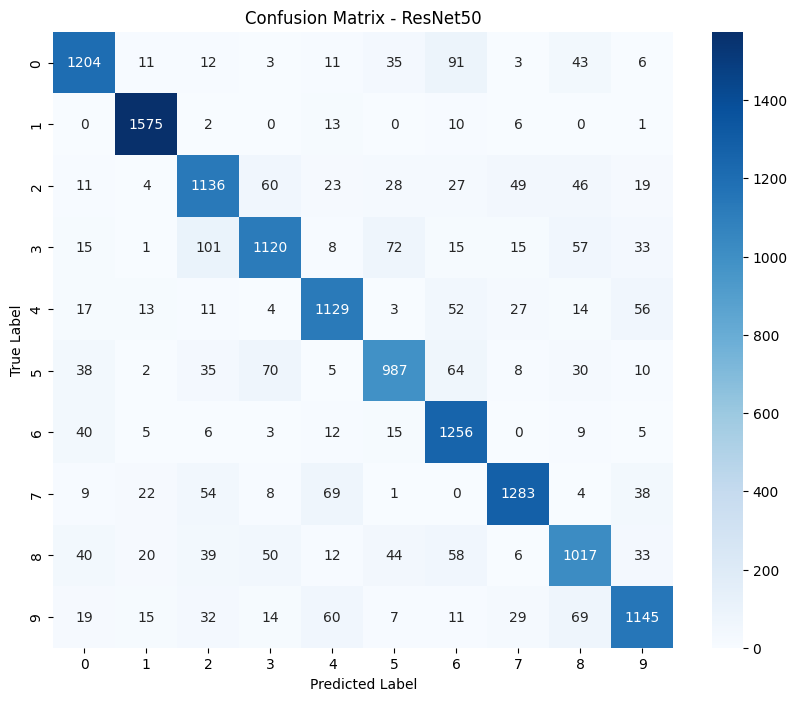

Classification Report for ResNet50:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1419
           1       0.94      0.98      0.96      1607
           2       0.80      0.81      0.80      1403
           3       0.84      0.78      0.81      1437
           4       0.84      0.85      0.85      1326
           5       0.83      0.79      0.81      1249
           6       0.79      0.93      0.86      1351
           7       0.90      0.86      0.88      1488
           8       0.79      0.77      0.78      1319
           9       0.85      0.82      0.83      1401

    accuracy                           0.85     14000
   macro avg       0.84      0.84      0.84     14000
weighted avg       0.85      0.85      0.85     14000

438/438 [==============================] - 196s 447ms/step


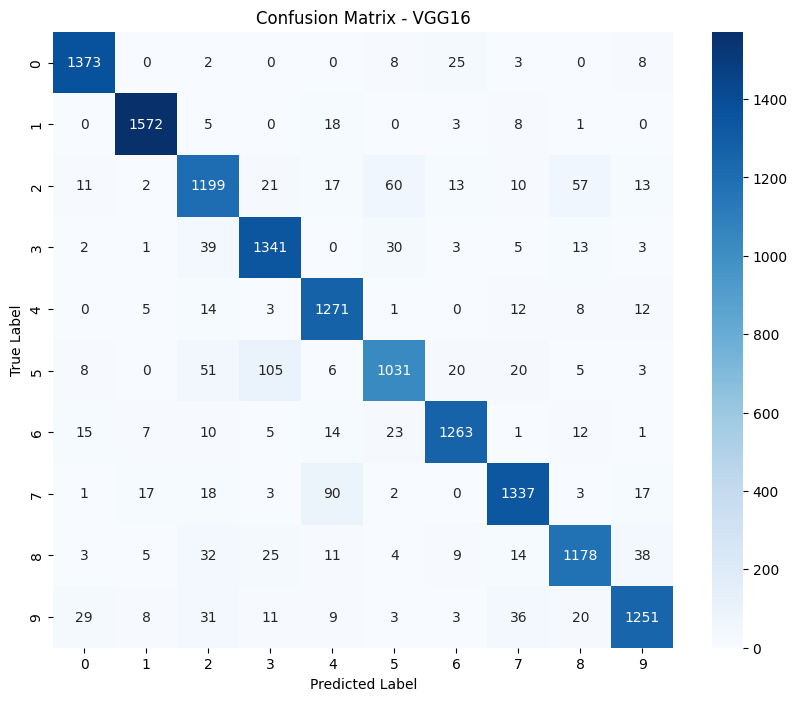

Classification Report for VGG16:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1419
           1       0.97      0.98      0.98      1607
           2       0.86      0.85      0.86      1403
           3       0.89      0.93      0.91      1437
           4       0.89      0.96      0.92      1326
           5       0.89      0.83      0.86      1249
           6       0.94      0.93      0.94      1351
           7       0.92      0.90      0.91      1488
           8       0.91      0.89      0.90      1319
           9       0.93      0.89      0.91      1401

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000



In [14]:
# Predict and Generate Confusion Matrices
def plot_confusion_matrix(model, test_images, test_labels, model_name):
    predictions = model.predict(test_images)
    predicted_classes = np.argmax(predictions, axis = 1)
    conf_matrix = confusion_matrix(test_labels, predicted_classes)

    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    print(f"Classification Report for {model_name}:")
    print(classification_report(test_labels, predicted_classes, target_names=[str(i) for i in range(10)]))



In [ ]:
# ResNet Confusion Matrix and Report
plot_confusion_matrix(resnet_model, test_images_rgb, test_labels, "ResNet50")

In [ ]:
# VGG Confusion Matrix and Report
plot_confusion_matrix(vgg_model, test_images_rgb, test_labels, "VGG16")